**Project Description :-**

This project is about prediction of yearly amount spent by customer on any fashion e-commerce startup based on data given such as time spent on website, duration of membership, time spent on app, session duration.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [189]:
X = np.genfromtxt("train_X_lr.csv", delimiter=',', dtype=np.float64, skip_header=1)
Y = np.genfromtxt("train_Y_lr.csv", delimiter=',', dtype=np.float64)

In [277]:
X = np.insert(X, 0, 1, axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=1)

In [278]:
def cost_function(X, Y, W):
    m = (len(X))
    Y_pred = np.dot(X, W)
    difference = Y_pred - Y
    cost = (1/(2*m))*(np.sum(np.square(difference)))
    return cost

In [279]:
def compute_gradient_of_cost_function(X, Y, W):
    Y_pred = np.dot(X, W)
    difference = Y_pred - Y
    dw = (1/len(X))*(np.dot(difference.T, X))
    dw = dw.T
    return dw

In [280]:
def optimize_weight_using_gradient_descent(X, Y, W, learning_rate, cost_values, Iterations):
    Threshold = 0.01
    for i in range(1, 10**8):
        dw = compute_gradient_of_cost_function(X, Y, W)
        W = W - (learning_rate*dw)
        if ((i%5000) == 0):
          cost = cost_function(X, Y, W)
          cost_values.append(cost)
          Iterations.append(i)
    return W, cost_values, Iterations

In [281]:
def train_model(X, Y, cost_values, Iterations):
    Y = Y.reshape(len(X), 1)
    W = np.zeros((X.shape[1], 1))
    W, cost_values, Iterations = optimize_weight_using_gradient_descent(X, Y, W, 0.0001, cost_values, Iterations)
    return W, cost_values, Iterations

In [282]:
cost_values = list()
Iterations = list()
weights, cost, Iter = train_model(X_train, Y_train, cost_values, Iterations)
weights

array([[-1.81697108e+03],
       [-1.81697108e+03],
       [ 1.24885404e+00],
       [ 6.80611286e+01],
       [ 4.14509350e+01],
       [ 2.77587150e+01]])

Text(0, 0.5, 'Cost Value')

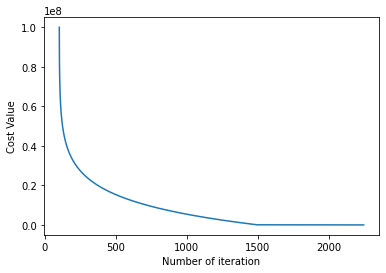

In [290]:
plt.plot(cost, Iter)
plt.xlabel('Number of iteration')
plt.ylabel('Cost Value')

Validation of model based on MSE Value of test sets of data. 

In [284]:
def predict_target_values(X_test, weights):
    pred_y = np.dot(X_test, weights)
    return pred_y

In [295]:
pred = predict_target_values(X_test, weights)

In [300]:
m = len(Y_test)
diff = pred.reshape(1, m)[0] - Y_test
MSE = (1/(2*m))*(np.sum(np.square(diff)))
MSE

123.09912263222407